In [7]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import os
import cv2
import numpy as np
from PIL import Image
import torch
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from transformers import CLIPProcessor, CLIPModel
from models.clip_module import clip_prediction, load_images
from models.sam_module import segment_image
import os
import torch
import cv2
import numpy as np
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel
import numpy as np
from torchvision import transforms
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator


def load_images(image_paths):
    """ Load images from given paths. """
    return [Image.open(path) for path in image_paths]

def create_and_show_grid(image_dict, max_images_per_row=5):
    padding = 10  # Space between images
    image_size = (100, 100)  # Size of each image in the grid

    # Determine the size of the grid
    total_width = max_images_per_row * (image_size[0] + padding) - padding
    total_rows = sum(-(-len(imgs) // max_images_per_row) for imgs in image_dict.values()) + len(image_dict)
    total_height = total_rows * (image_size[1] + padding) + padding

    # Create a new image with a white background
    new_im = Image.new('RGB', (total_width, total_height), 'white')
    draw = ImageDraw.Draw(new_im)

    y_offset = padding
    for label, paths in image_dict.items():
        images = load_images(paths)
        draw.text((padding, y_offset), label, fill="black", font=ImageFont.load_default())
        y_offset += 20  # Space for the label
        x_offset = padding
        row_images = 0
        for im in images:
            im = im.resize(image_size)
            new_im.paste(im, (x_offset, y_offset))
            x_offset += image_size[0] + padding
            row_images += 1
            if row_images >= max_images_per_row:
                row_images = 0
                y_offset += image_size[1] + padding
                x_offset = padding
        y_offset += image_size[1] + padding

    # Display the grid in the Jupyter Notebook
    display(new_im)




In [8]:
from pipeline import run_pipeline

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
label_texts = ["cat", "antelope", "bear", "Background"]  # Add your text here
image_paths = ["/home/jr151/data/animals/animals/antelope/02f4b3be2d.jpg", "/home/jr151/data/animals/animals/antelope/03d7fc0888.jpg", "/home/jr151/data/animals/animals/bear/039b2ae790.jpg"]  # Add your image paths here
Model_dir = os.path.join('/home/jr151/model')
CHECKPOINT_PATH = os.path.join(Model_dir, "seg", "sam_vit_h_4b8939.pth")
DEVICE = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)
segment_result_dir = '/home/jr151/code/projects/Auto-Segment-Collage/results/'

animal_images = run_pipeline(image_paths, mask_generator, clip_model, clip_processor, device, label_texts, segment_result_dir)
print(animal_images.keys())
print(animal_images)

dict_keys(['antelope', 'bear'])
{'antelope': ['/home/jr151/code/projects/Auto-Segment-Collage/results/02f4b3be2d.jpg/segmented_image_0.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/02f4b3be2d.jpg/segmented_image_2.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/02f4b3be2d.jpg/segmented_image_3.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/02f4b3be2d.jpg/segmented_image_4.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/02f4b3be2d.jpg/segmented_image_5.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/02f4b3be2d.jpg/segmented_image_7.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/03d7fc0888.jpg/segmented_image_1.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/03d7fc0888.jpg/segmented_image_9.png', '/home/jr151/code/projects/Auto-Segment-Collage/results/03d7fc0888.jpg/segmented_image_13.png'], 'bear': ['/home/jr151/code/projects/Auto-Segment-Collage/results/03d7fc0888.jpg/segmented_image_1

In [10]:
def get_file_paths(directory):
    """
    Collect all file paths in the given directory and its subdirectories.

    Args:
    directory (str): The path to the directory where files are to be searched.

    Returns:
    list: A list containing all file paths found within the directory and its subdirectories.
    """
    file_paths = []  # List to store all file paths
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_paths.append(file_path)
    return file_paths

# Example usage
dataset_dir = "/home/jr151/data/animals/animals/antelope"  # Replace with your actual dataset directory
all_file_paths = get_file_paths(dataset_dir)
print(all_file_paths)

['/home/jr151/data/animals/animals/antelope/fd085737a4.jpg', '/home/jr151/data/animals/animals/antelope/8b1539144f.jpg', '/home/jr151/data/animals/animals/antelope/0fe7076f06.jpg', '/home/jr151/data/animals/animals/antelope/61f99c8534.jpg', '/home/jr151/data/animals/animals/antelope/6fb2619e84.jpg', '/home/jr151/data/animals/animals/antelope/058fa9a60f.jpg', '/home/jr151/data/animals/animals/antelope/34e5155c46.jpg', '/home/jr151/data/animals/animals/antelope/fc1dd26858.jpg', '/home/jr151/data/animals/animals/antelope/1d3c6105c9.jpg', '/home/jr151/data/animals/animals/antelope/1d556456dc.jpg', '/home/jr151/data/animals/animals/antelope/72e3e735f7.jpg', '/home/jr151/data/animals/animals/antelope/26ffc1ee1f.jpg', '/home/jr151/data/animals/animals/antelope/27d251fa65.jpg', '/home/jr151/data/animals/animals/antelope/73c2ef82e2.jpg', '/home/jr151/data/animals/animals/antelope/82e0981104.jpg', '/home/jr151/data/animals/animals/antelope/fc6545699d.jpg', '/home/jr151/data/animals/animals/antel

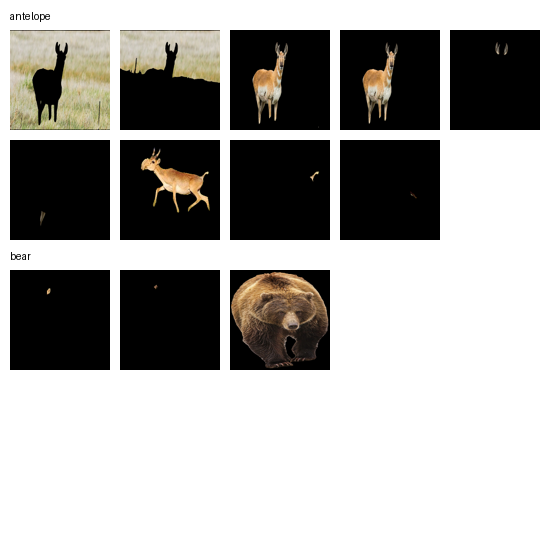

In [6]:
create_and_show_grid(animal_images)